# maxvogt-analysis: Wila

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [WILA003](https://mtwente.github.io/maxvogt/items/wila003.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Fwila.ipynb)

In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [6]:
place = 'Wila, Switzerland'
local_crs = 'EPSG:2056'

In [7]:
geopandas.tools.geocode(place).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [8]:
buildings = osmnx.features.features_from_place(place, tags={'building':True})

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [9]:
buildings

geometry  \
element_type osmid                                                           
way          39881183    POLYGON ((8.88476 47.40885, 8.88469 47.40893, ...   
             39881185    POLYGON ((8.88445 47.40895, 8.88443 47.40915, ...   
             39881188    POLYGON ((8.88150 47.41004, 8.88152 47.41015, ...   
             39884555    POLYGON ((8.87351 47.40876, 8.87352 47.40873, ...   
             39884572    POLYGON ((8.87267 47.40832, 8.87260 47.40845, ...   
...                                                                    ...   
             1190771852  POLYGON ((8.84809 47.41599, 8.84825 47.41601, ...   
             1190771853  POLYGON ((8.84701 47.41597, 8.84699 47.41603, ...   
             1193763850  POLYGON ((8.84792 47.42660, 8.84787 47.42664, ...   
             1284914866  POLYGON ((8.84845 47.41781, 8.84837 47.41791, ...   
             1284914870  POLYGON ((8.84872 47.41746, 8.84874 47.41745, ...   

                                                                     nodes  \
element_type osmid                                                           
way          39881183    [478515633, 478515634, 2593022957, 2593022967,...   
             39881185    [478515653, 2593023076, 2593023075, 478515655,...   
             39881188    [478515714, 2593023266, 2593023268, 478515717,...   
             39884555    [2593022872, 2593022836, 2593022840, 259302286...   
             39884572    [478535165, 478535167, 2593022623, 2593022614,...   
...                                                                    ...   
             1190771852  [11056305792, 11056305791, 11056305790, 110563...   
             1190771853  [11056305818, 11056305817, 11056305816, 110563...   
             1193763850  [11080990802, 11080990803, 11080990804, 259396...   
             1284914866  [2286049428, 11920160968, 11920166369, 2286049...   
             1284914870  [11920166382, 11920166383, 11920166384, 119201...   

                           building note addr:city addr:housenumber  \
element_type osmid                                                    
way          39881183           yes  NaN       NaN              NaN   
             39881185           yes  NaN       NaN              NaN   
             39881188           yes  NaN       NaN              NaN   
             39884555           yes  NaN       NaN              NaN   
             39884572           yes  NaN       NaN              NaN   
...                             ...  ...       ...              ...   
             1190771852        roof  NaN       NaN              NaN   
             1190771853         yes  NaN       NaN              NaN   
             1193763850         yes  NaN      Wila               12   
             1284914866  commercial  NaN       NaN              NaN   
             1284914870        roof  NaN       NaN              NaN   

                        addr:postcode addr:street          amenity name  ...  \
element_type osmid                                                       ...   
way          39881183             NaN         NaN              NaN  NaN  ...   
             39881185             NaN         NaN              NaN  NaN  ...   
             39881188             NaN         NaN              NaN  NaN  ...   
             39884555             NaN         NaN              NaN  NaN  ...   
             39884572             NaN         NaN              NaN  NaN  ...   
...                               ...         ...              ...  ...  ...   
             1190771852           NaN         NaN              NaN  NaN  ...   
             1190771853           NaN         NaN              NaN  NaN  ...   
             1193763850          8492         NaN              NaN  NaN  ...   
             1284914866           NaN         NaN              NaN  NaN  ...   
             1284914870           NaN         NaN  bicycle_parking  NaN  ...   

                        building:roof craft shooting roof:orientation  

In [10]:
buildings.geom_type.value_counts()

Polygon    905
Name: count, dtype: int64

In [11]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [12]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [13]:
buildings["uID"] = range(len(buildings))

In [14]:
buildings

,geometry,uID
0,"POLYGON ((2709143.880 1251898.665, 2709137.854...",0
1,"POLYGON ((2709119.729 1251908.628, 2709118.393...",1
2,"POLYGON ((2708895.036 1252025.924, 2708896.486...",2
3,"POLYGON ((2708294.999 1251872.724, 2708295.516...",3
4,"POLYGON ((2708232.696 1251822.445, 2708226.436...",4
...,...,...
900,"POLYGON ((2706362.435 1252641.733, 2706374.303...",900
901,"POLYGON ((2706280.940 1252637.534, 2706279.136...",901
902,"POLYGON ((2706327.871 1253820.851, 2706324.498...",902
903,"POLYGON ((2706385.569 1252844.180, 2706379.572...",903


### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [19]:
osm_graph = osmnx.graph_from_place(place, network_type='drive_service', truncate_by_edge=True)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [20]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [21]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [22]:
streets.explore()

In [24]:
streets

osmid lanes  ref              name  \
u           v           key                                            
246627537   271187419   0      24957346     2  818  Schalchenstrasse   
            416559052   0     221476973     2   15    Tösstalstrasse   
            599920243   0     221476974     2   15    Tösstalstrasse   
271187419   246627537   0      24957346     2  818  Schalchenstrasse   
            434018190   0     827694276     2  818  Schalchenstrasse   
...                                 ...   ...  ...               ...   
11053943036 11053943035 0    1190494151   NaN  NaN               NaN   
11055662984 11055677045 0    1190698433   NaN  NaN               NaN   
11055676916 11055676910 0    1190698435   NaN  NaN               NaN   
11056280671 11056280670 0    1190771838   NaN  NaN               NaN   
11056280689 11056280690 0    1190771841   NaN  NaN               NaN   

                              highway maxspeed  oneway reversed  length  \
u           v           key                                               
246627537   271187419   0    tertiary       50   False    False  11.931   
            416559052   0     primary       50   False     True  38.676   
            599920243   0     primary       50   False    False  11.414   
271187419   246627537   0    tertiary       50   False     True  11.931   
            434018190   0    tertiary       50   False    False  94.734   
...                               ...      ...     ...      ...     ...   
11053943036 11053943035 0     service      NaN   False     True  29.643   
11055662984 11055677045 0     service      NaN   False     True  35.771   
11055676916 11055676910 0     service      NaN   False     True  16.861   
11056280671 11056280670 0     service      NaN   False     True  23.833   
11056280689 11056280690 0     service      NaN   False     True  32.655   

                                                                      geometry  \
u           v           key                                                      
246627537   271187419   0    LINESTRING (2706154.279 1253091.710, 2706150.1...   
            416559052   0    LINESTRING (2706154.279 1253091.710, 2706156.0...   
            599920243   0    LINESTRING (2706154.279 1253091.710, 2706153.0...   
271187419   246627537   0    LINESTRING (2706143.878 1253085.830, 2706145.3...   
            434018190   0    LINESTRING (2706143.878 1253085.830, 2706142.9...   
...                                                                        ...   
11053943036 11053943035 0    LINESTRING (2706499.689 1252900.031, 2706500.2...   
11055662984 11055677045 0    LINESTRING (2705959.975 1253604.727, 2705958.1...   
11055676916 11055676910 0    LINESTRING (2705915.525 1253617.342, 2705916.3...   
11056280671 11056280670 0    LINESTRING (2706116.752 1253658.422, 2706117.7...   
11056280689 11056280690 0    LINESTRING (2706117.901 1253674.300, 2706116.5...   

                              service bridge width access tunnel  
u           v           key                                       
246627537   271187419   0         NaN    NaN   NaN    NaN    NaN  
            416559052   0         NaN    NaN   NaN    NaN    NaN  
            599920243   0         NaN    NaN   NaN    NaN    NaN  
271187419   246627537   0         NaN    NaN   NaN    NaN    NaN  
            434018190   0         NaN    NaN   NaN    NaN    NaN  
...                               ...    ...   ...    ...    ...  
11053943036 11053943035 0    driveway    NaN   NaN    NaN    NaN  
11055662984 11055677045 0    driveway    NaN   NaN    NaN    NaN  
11055676916 11055676910 0    driveway    NaN   NaN    NaN    NaN  
11056280671 11056280670 0    driveway    NaN   NaN    NaN    NaN  
11056280689 11056280690 0    driveway    NaN   NaN    NaN    NaN  

[679 rows x 15 columns]

In [25]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

In [26]:
streets

,geometry,nID
0,"LINESTRING (2706154.279 1253091.710, 2706150.1...",0
1,"LINESTRING (2706154.279 1253091.710, 2706156.0...",1
2,"LINESTRING (2706154.279 1253091.710, 2706153.0...",2
3,"LINESTRING (2706143.878 1253085.830, 2706145.3...",3
4,"LINESTRING (2706143.878 1253085.830, 2706142.9...",4
...,...,...
536,"LINESTRING (2707128.041 1251679.422, 2707130.6...",536
537,"LINESTRING (2706942.937 1250532.682, 2706948.1...",537
538,"LINESTRING (2707432.337 1253095.963, 2707432.6...",538
539,"LINESTRING (2707474.590 1253124.909, 2707477.7...",539


## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [27]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [28]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [29]:
buildings

,geometry,uID,index_right,nID
0,"POLYGON ((2709143.880 1251898.665, 2709137.854...",0,NaN,NaN
1,"POLYGON ((2709119.729 1251908.628, 2709118.393...",1,NaN,NaN
2,"POLYGON ((2708895.036 1252025.924, 2708896.486...",2,540.0,540.0
3,"POLYGON ((2708294.999 1251872.724, 2708295.516...",3,540.0,540.0
4,"POLYGON ((2708232.696 1251822.445, 2708226.436...",4,540.0,540.0
...,...,...,...,...
902,"POLYGON ((2706327.871 1253820.851, 2706324.498...",902,488.0,488.0
903,"POLYGON ((2706385.569 1252844.180, 2706379.572...",903,129.0,129.0
903,"POLYGON ((2706385.569 1252844.180, 2706379.572...",903,135.0,135.0
904,"POLYGON ((2706407.006 1252806.301, 2706407.998...",904,129.0,129.0


In [30]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [31]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [32]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [33]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [34]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [35]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [36]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


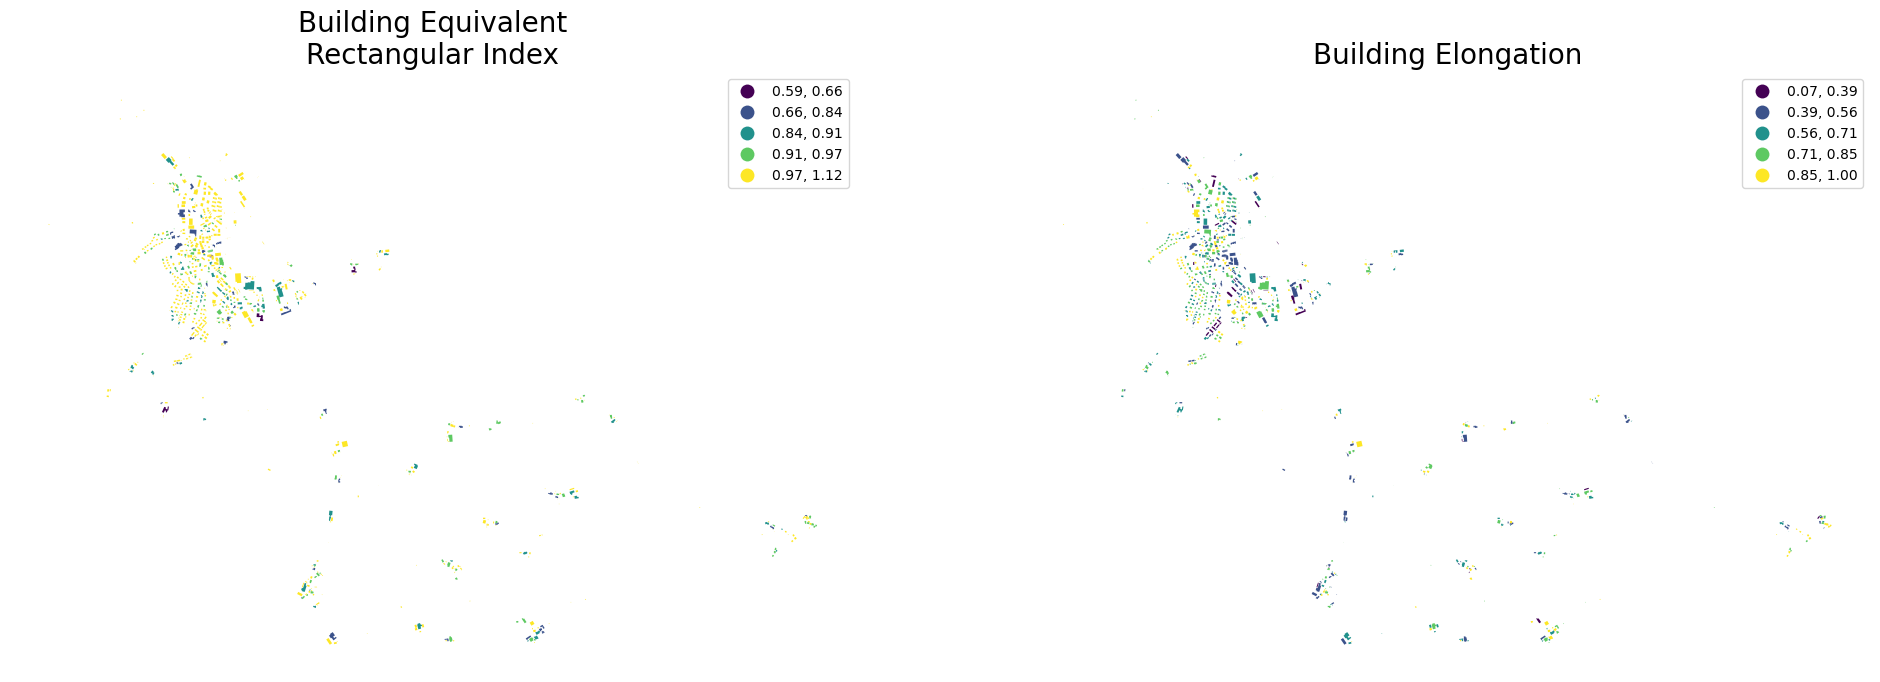

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Wila/eri_and_elongation.svg')  

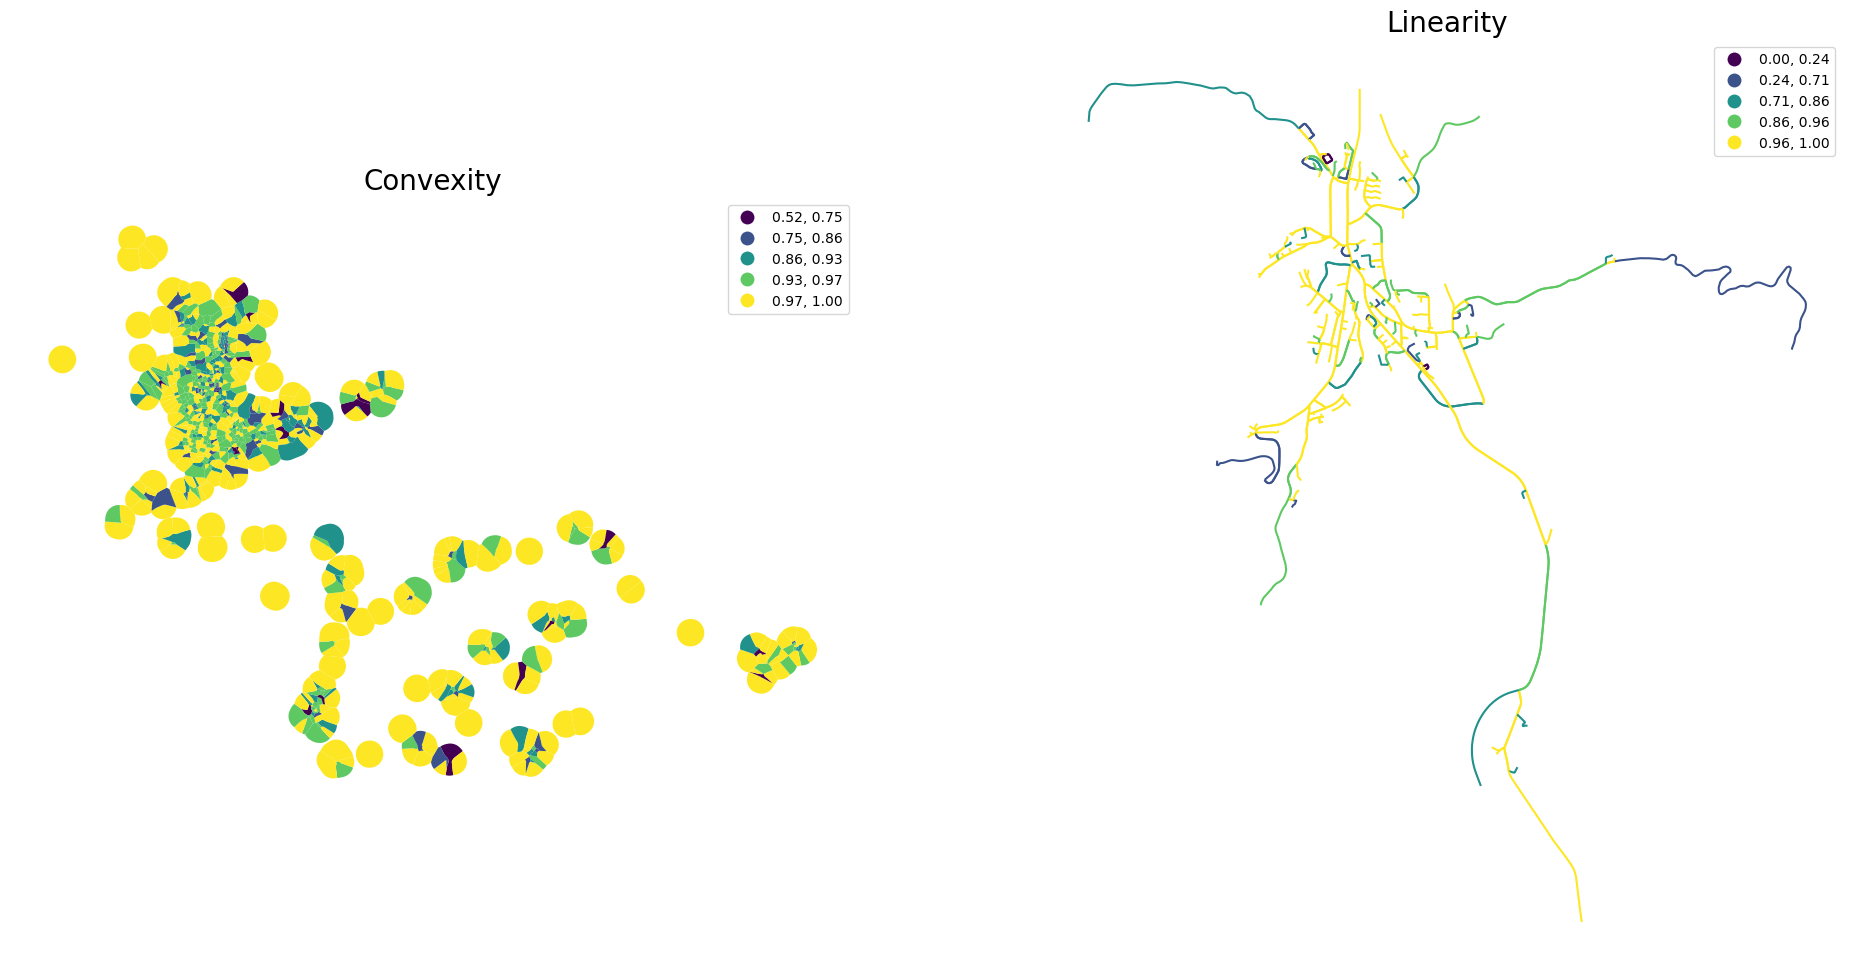

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Wila/convexity_and_linearity.svg')  

### Spatial distribution

In [65]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


KeyError: 'shared_walls'

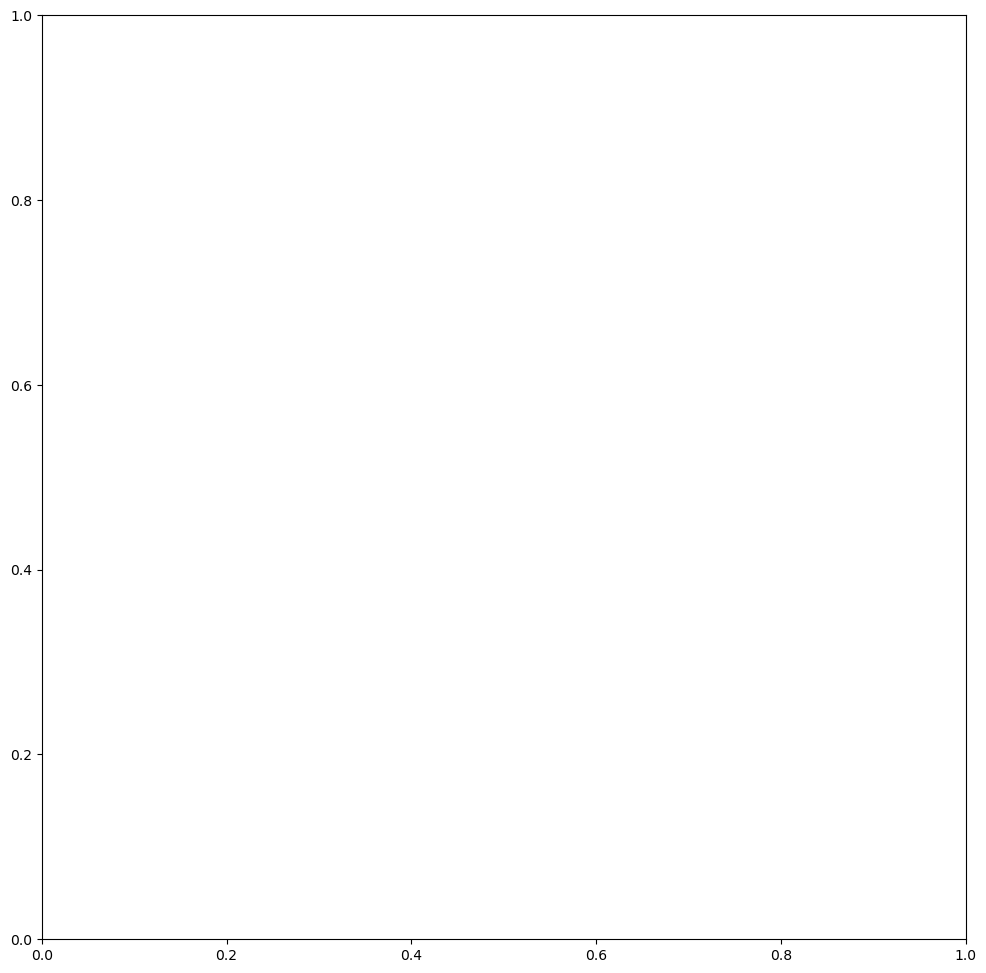

In [39]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Wila/sharedwalls.svg')  

Generate spatial weights matrix using `libpysal`.

In [40]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [41]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


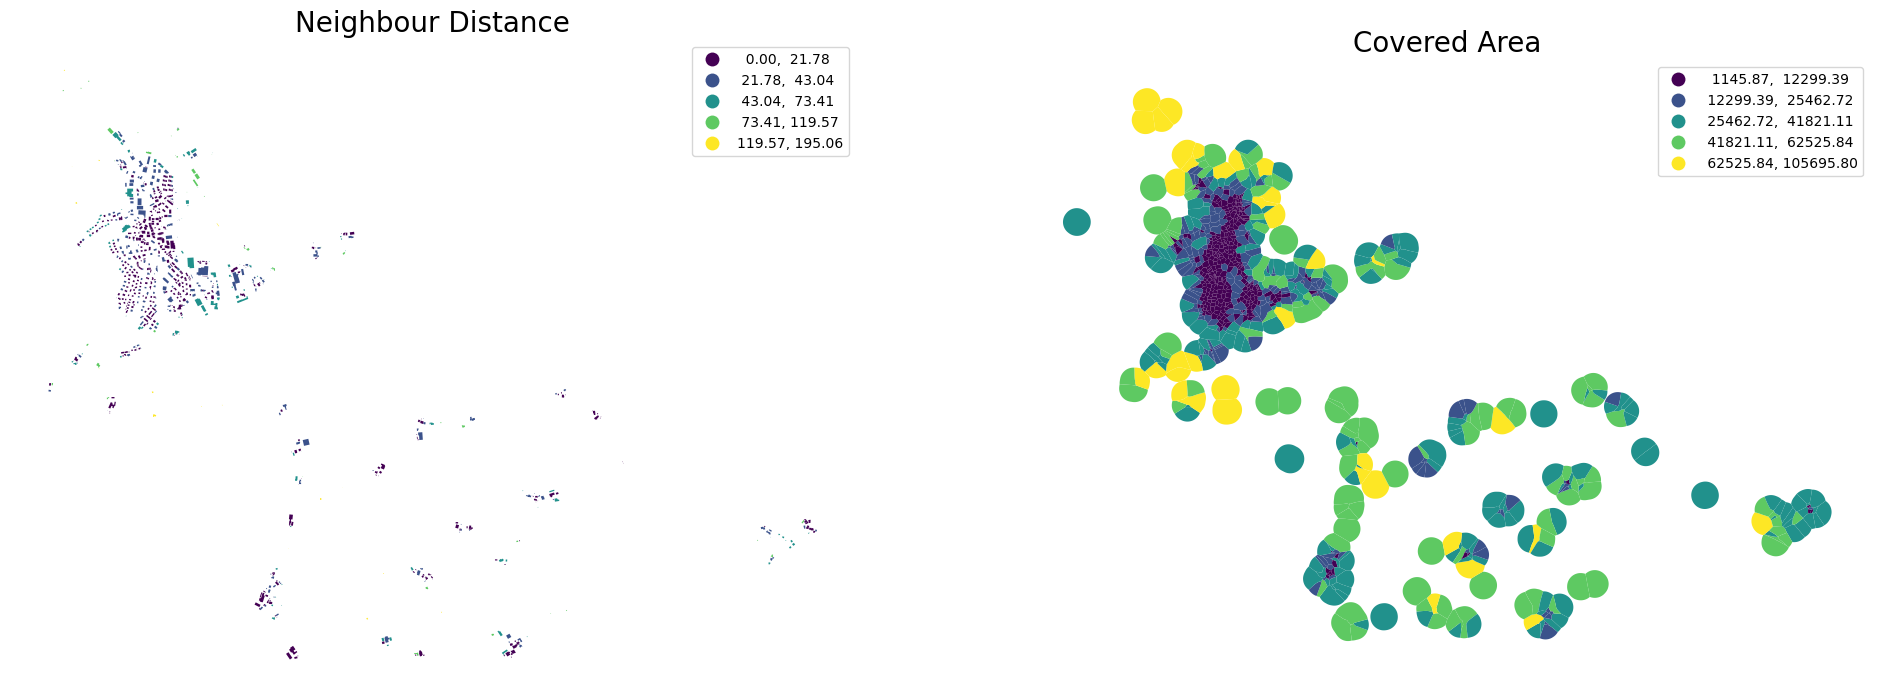

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Wila/neighbourdist_and_coveredarea.svg')  

In [43]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [44]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [45]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


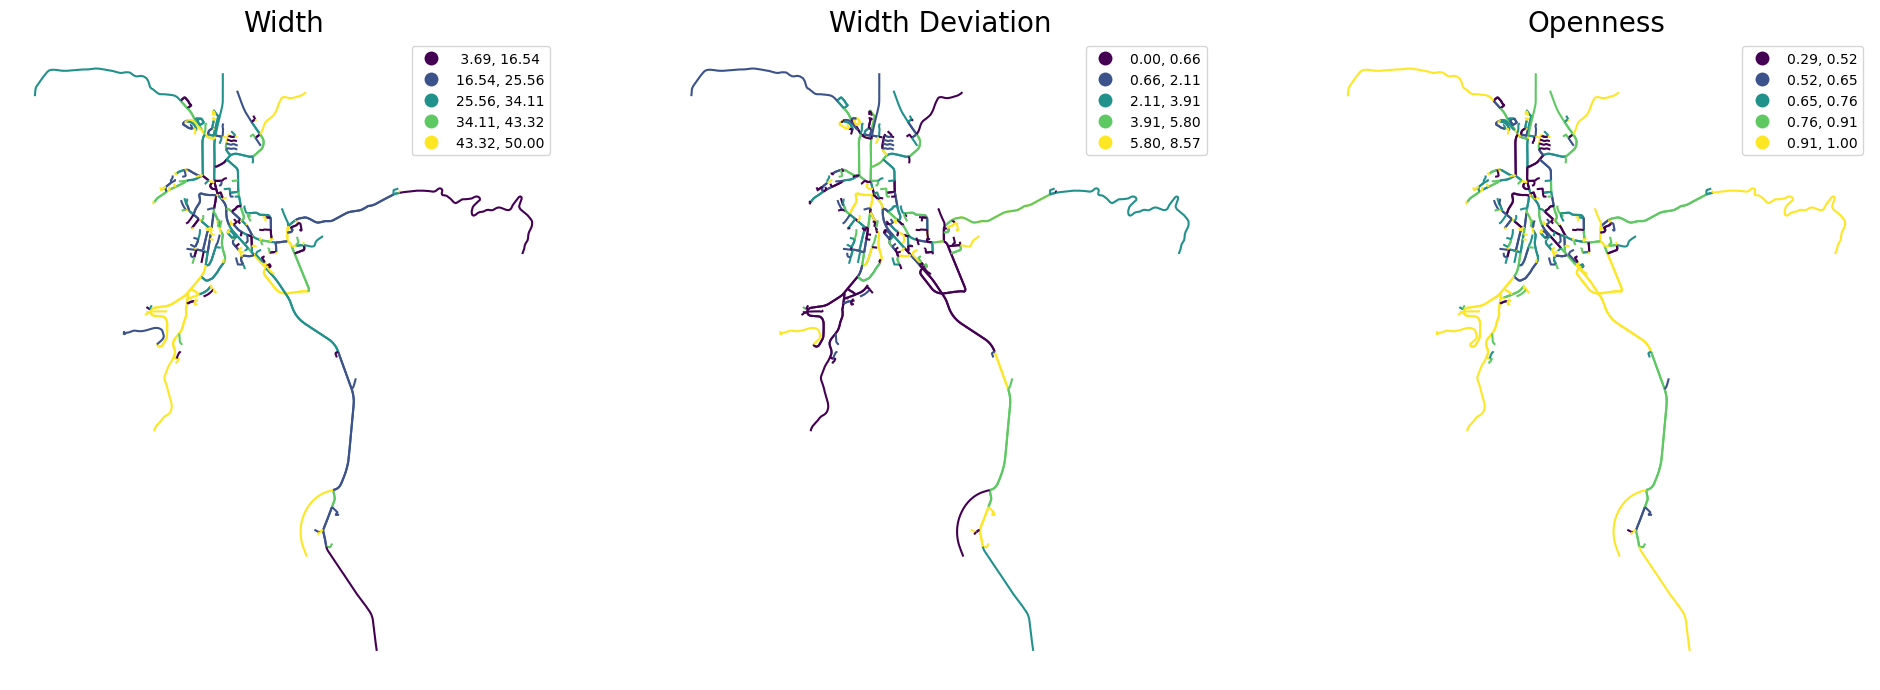

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Wila/road_network.svg')  

### Intensity

In [48]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


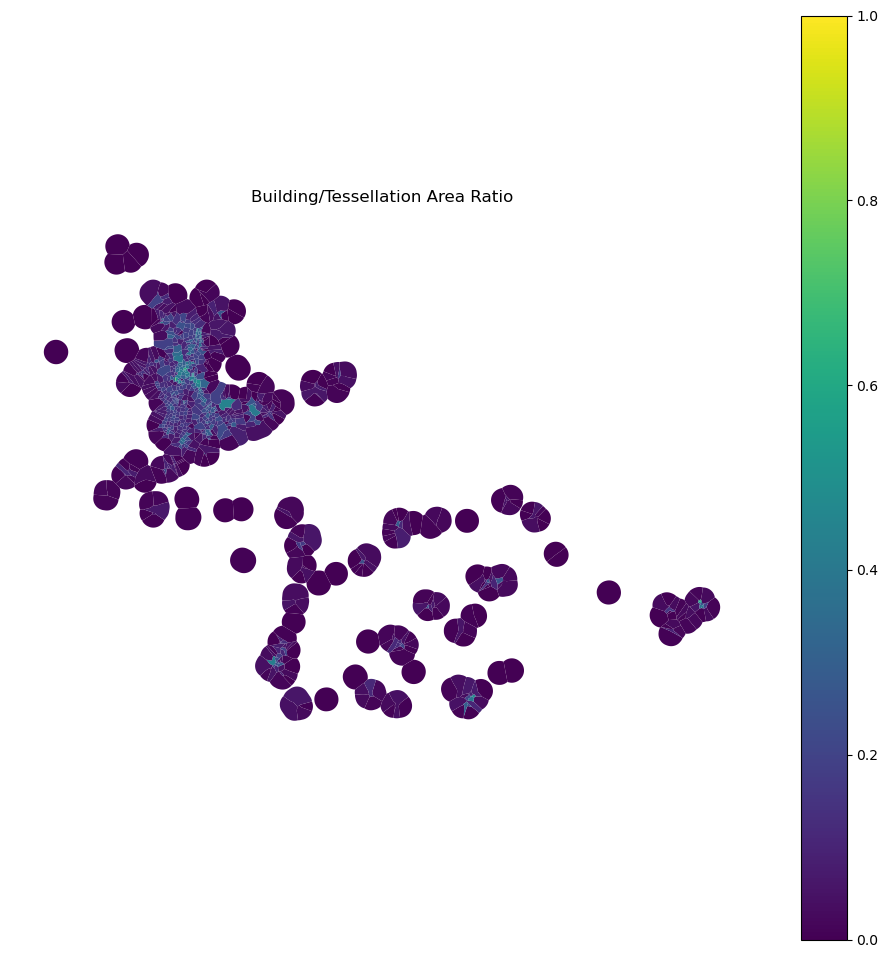

In [49]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Wila/tessellation_ratio.svg')  

### Connectivity

In [50]:
graph = momepy.gdf_to_nx(streets)

In [51]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

In [52]:
nodes, streets = momepy.nx_to_gdf(graph)

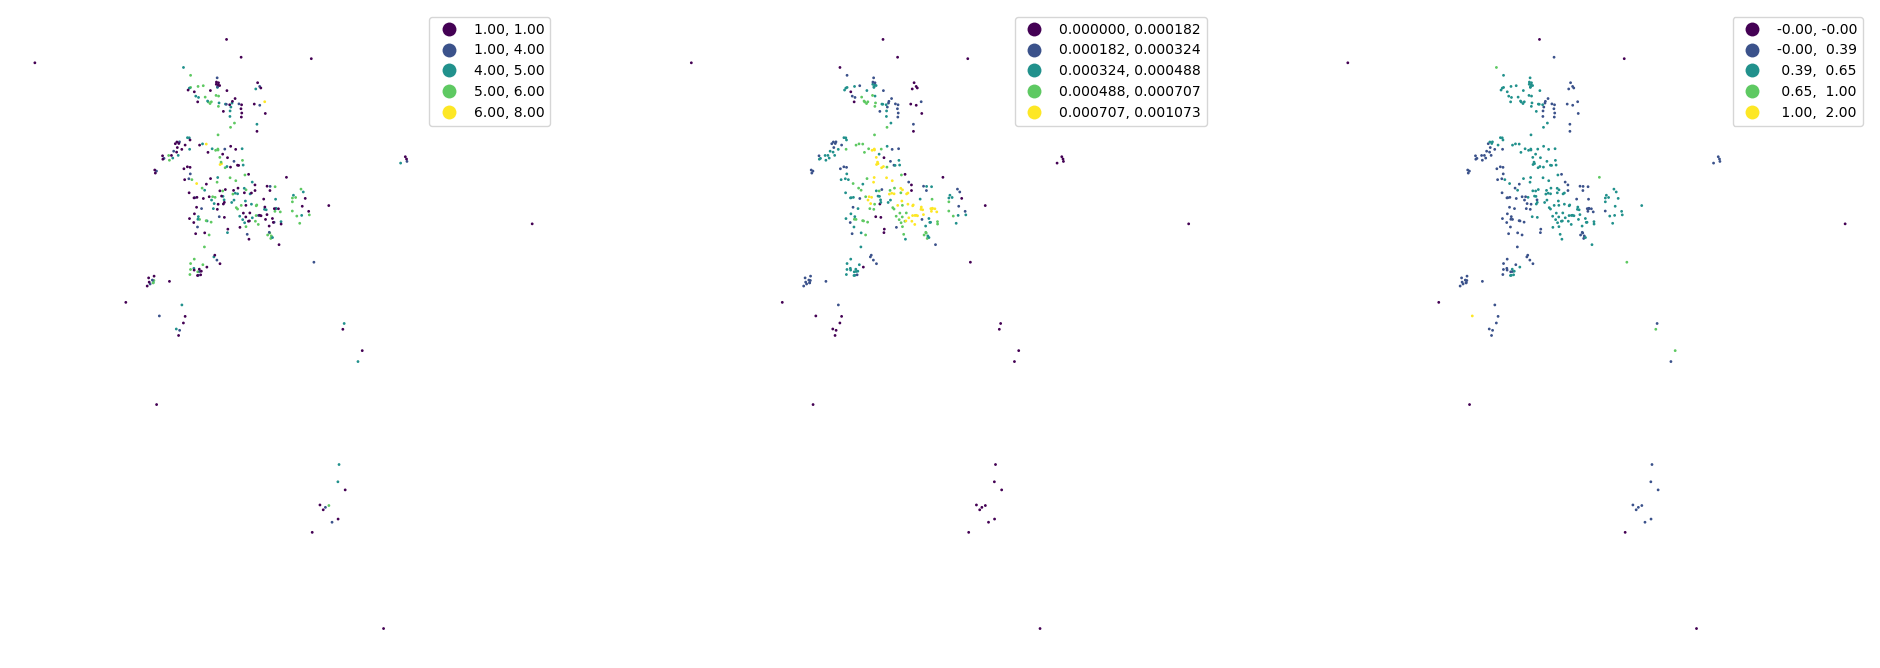

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Wila/connectivity.svg')  

In [54]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/905 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [55]:
tessellation

,uID,geometry,nID,area,convexity,neighbors,covered_area,car
0,57,"POLYGON ((2707936.249 1250284.318, 2707939.645...",537.0,17565.573347,0.650343,0.004265,49474.164809,0.039337
1,17,"POLYGON ((2707097.339 1250254.869, 2707097.244...",537.0,10347.482866,0.957562,0.007274,62343.008910,0.024340
2,63,"POLYGON ((2707873.102 1250275.905, 2707901.131...",537.0,6227.590762,0.986254,0.006120,35427.666803,0.010019
3,110,"POLYGON ((2708424.165 1250259.649, 2708497.989...",NaN,7645.742058,0.989915,0.008385,30424.217048,0.008707
4,97,"POLYGON ((2707964.556 1250300.034, 2707964.458...",537.0,14046.498007,0.999547,0.002162,31612.071353,0.004639
...,...,...,...,...,...,...,...,...
900,870,"POLYGON ((2705925.785 1253873.539, 2705925.021...",96.0,25352.422380,0.989117,0.004880,67990.706570,0.033992
901,681,"POLYGON ((2705528.718 1254145.525, 2705529.899...",401.0,25447.495927,0.995804,0.003371,71788.992699,0.001824
902,760,"POLYGON ((2705633.873 1254006.854, 2705633.656...",401.0,17690.166481,0.996816,0.005627,95502.612805,0.001758
903,869,"POLYGON ((2705930.964 1253789.629, 2705930.682...",98.0,8164.206997,0.990381,0.011669,65714.439569,0.020996


In [56]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [57]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [58]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_36512/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [59]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [60]:
percentiles_joined

,area_x_25,area_x_50,area_x_75,convexity_25,convexity_50,convexity_75,neighbors_25,neighbors_50,neighbors_75,covered_area_25,...,y_75,degree_25,degree_50,degree_75,closeness_25,closeness_50,closeness_75,meshedness_25,meshedness_50,meshedness_75
0,9474.032293,11877.221292,14223.716178,0.801792,0.981870,0.994118,0.005193,0.006812,0.008502,37223.106010,...,1.249774e+06,1.0,1.0,1.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
1,7935.566231,15758.794212,23235.938224,0.963988,0.971517,0.985150,0.004123,0.005554,0.006795,48996.131332,...,1.250533e+06,4.0,4.0,4.0,0.000113,0.000113,0.000113,0.333333,0.333333,0.333333
2,9474.032293,11877.221292,14223.716178,0.801792,0.981870,0.994118,0.005193,0.006812,0.008502,37223.106010,...,1.249774e+06,1.0,1.0,1.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
3,1563.672106,6539.998201,10050.749601,0.898238,0.971289,0.988915,0.009908,0.017193,0.028834,23471.934503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11877.221292,13083.218948,14223.716178,0.878399,0.987471,0.994118,0.005193,0.006256,0.006812,41147.543235,...,1.249774e+06,1.0,1.0,1.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2033.579811,3409.899168,8313.110072,0.909624,0.968076,0.991674,0.013963,0.021918,0.028984,17195.101228,...,1.253722e+06,5.0,5.0,5.5,0.000210,0.000210,0.000285,0.485098,0.551724,0.615385
901,20701.893294,24580.558017,27049.413109,0.996310,0.996912,0.997998,0.003401,0.004161,0.005259,70922.054788,...,1.253779e+06,5.0,5.0,5.0,0.000128,0.000128,0.000128,0.714286,0.714286,0.714286
902,20701.893294,24580.558017,27049.413109,0.996310,0.996912,0.997998,0.003401,0.004161,0.005259,70922.054788,...,1.253779e+06,5.0,5.0,5.0,0.000128,0.000128,0.000128,0.714286,0.714286,0.714286
903,2284.782899,4664.821519,7902.733516,0.951223,0.980826,0.992921,0.015116,0.022083,0.025175,25935.918639,...,1.253722e+06,2.5,5.0,6.0,0.000173,0.000232,0.000319,0.471698,0.549020,0.615385


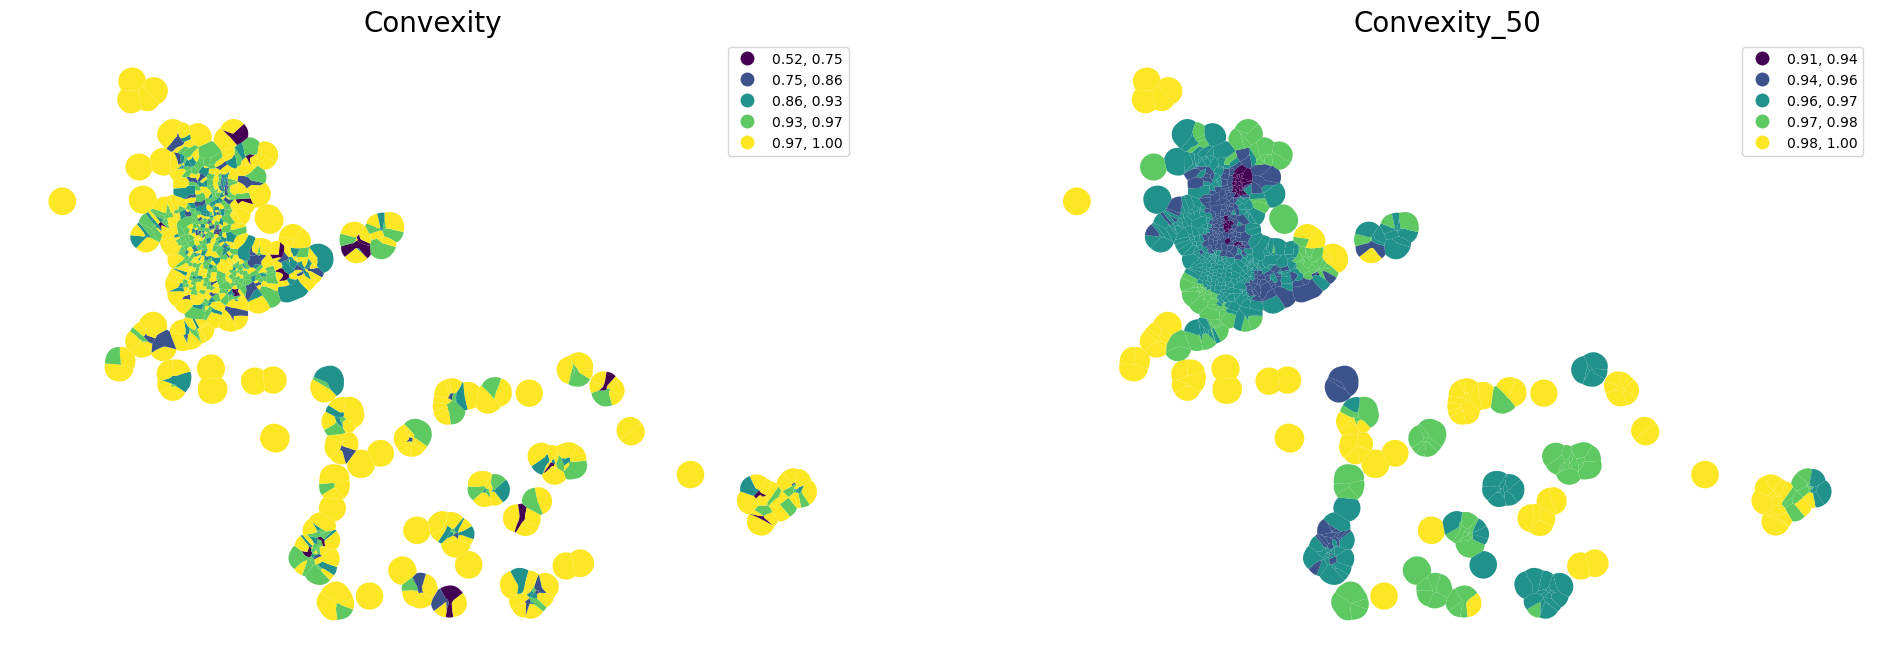

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Wila/convexity.svg')  

## Clustering

Standardize values before clustering.

In [62]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [63]:
standardized

,area_x_25,area_x_50,area_x_75,convexity_25,convexity_50,convexity_75,neighbors_25,neighbors_50,neighbors_75,covered_area_25,...,y_75,degree_25,degree_50,degree_75,closeness_25,closeness_50,closeness_75,meshedness_25,meshedness_50,meshedness_75
0,1.764163,1.763538,1.541061,-5.058007,1.217183,1.232481,-1.477031,-1.687965,-1.917123,1.769739,...,-3.660969,-0.776622,-2.187125,-3.733122,-1.633369,-1.744291,-1.847440,-3.328124,-3.404912,-3.469036
1,1.397094,2.571655,3.138312,1.365372,0.491424,0.231487,-1.557825,-1.769323,-2.013571,2.710281,...,-2.727225,0.877950,-0.280541,-1.208050,-0.991910,-1.256071,-1.426142,-0.351731,-0.563486,-0.767344
2,1.764163,1.763538,1.541061,-5.058007,1.217183,1.232481,-1.477031,-1.687965,-1.917123,1.769739,...,-3.660969,-0.776622,-2.187125,-3.733122,-1.633369,-1.744291,-1.847440,-3.328124,-3.404912,-3.469036
3,-0.123200,0.652365,0.801479,-1.238490,0.475385,0.651753,-1.120931,-1.016399,-0.768222,0.671164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.337549,2.014618,1.541061,-2.024160,1.609897,1.232481,-1.477031,-1.723896,-2.012627,2.083261,...,-3.660969,-0.776622,-2.187125,-3.733122,-1.633369,-1.744291,-1.847440,-3.328124,-3.404912,-3.469036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-0.011083,0.000700,0.493515,-0.787584,0.250145,0.959727,-0.814711,-0.710754,-0.759762,0.169711,...,1.198263,1.429475,0.354987,0.054487,-0.446760,-0.841152,-0.787917,1.003403,1.298138,1.518703
901,4.443061,4.408285,3.814181,2.645424,2.271713,1.665549,-1.612350,-1.859446,-2.100379,4.461933,...,1.267296,1.429475,0.354987,-0.366359,-0.906105,-1.190764,-1.369786,3.049861,2.683858,2.320304
902,4.443061,4.408285,3.814181,2.645424,2.271713,1.665549,-1.612350,-1.859446,-2.100379,4.461933,...,1.267296,1.429475,0.354987,-0.366359,-0.906105,-1.190764,-1.369786,3.049861,2.683858,2.320304
903,0.048852,0.261966,0.420783,0.859873,1.144021,1.098839,-0.727683,-0.700117,-0.975009,0.868011,...,1.198263,0.050664,0.354987,0.475332,-0.656068,-0.742930,-0.661439,0.883753,1.275084,1.518703


### How many clusters?

In [64]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.062 seconds.
K=3 fitted in 0.024 seconds.
K=4 fitted in 0.016 seconds.
K=5 fitted in 0.021 seconds.
K=6 fitted in 0.022 seconds.
K=7 fitted in 0.025 seconds.
K=8 fitted in 0.021 seconds.
K=9 fitted in 0.033 seconds.
K=10 fitted in 0.029 seconds.
K=11 fitted in 0.028 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [65]:
show(cgram.bokeh())

In [66]:
cgram.labels.head()

,1,2,3,4,5,6,7,8,9,10,11
0,0,1,2,3,1,1,1,2,6,2,2
1,0,1,2,3,1,1,1,2,6,9,9
2,0,1,2,3,1,1,1,2,6,2,2
3,0,1,0,0,2,0,2,0,4,9,9
4,0,1,2,3,1,1,1,2,6,2,2


In [67]:
merged["cluster"] = cgram.labels[8].values

In [68]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [69]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [70]:
urban_types.to_file('../data/raw/Wila.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>